In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/home/shaury/final.csv',index_col='Unnamed: 0')
pd.set_option("display.max_columns", None)

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,LATE_AIRCRAFT_DELAY,time,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Condition
0,2018-01-01,EWR,ATL,1044,1055.0,11.0,1106.0,1310.0,5.0,1318,-3.0,0.0,0.0,154.0,140.0,124.0,746.0,NaN,NaN,NaN,2018-01-01 10:55:00,19,6,57,15,0,29.36,0.0,Light Snow
1,2018-01-01,EWR,ATL,1409,1429.0,20.0,1442.0,1646.0,9.0,1643,12.0,0.0,0.0,154.0,146.0,124.0,746.0,NaN,NaN,NaN,2018-01-01 14:29:00,25,9,50,12,0,29.34,0.0,Cloudy
2,2018-01-01,EWR,ATL,945,945.0,0.0,959.0,1157.0,5.0,1219,-17.0,0.0,0.0,154.0,137.0,118.0,746.0,NaN,NaN,NaN,2018-01-01 09:45:00,19,6,57,15,0,29.33,0.0,Cloudy
3,2018-01-01,IAH,ATL,1950,2311.0,201.0,2323.0,148.0,7.0,2251,184.0,0.0,0.0,121.0,104.0,85.0,689.0,0.0,0.0,52.0,2018-01-01 23:11:00,20,6,55,12,0,29.39,0.0,Fair
4,2018-01-01,EWR,ATL,1711,1720.0,9.0,1746.0,1945.0,5.0,1945,5.0,0.0,0.0,154.0,150.0,119.0,746.0,NaN,NaN,NaN,2018-01-01 17:20:00,27,10,49,13,0,29.35,0.0,Partly Cloudy


In [5]:
df.fillna(0,inplace=True)

In [6]:
df.head()

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,LATE_AIRCRAFT_DELAY,time,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Condition
0,2018-01-01,EWR,ATL,1044,1055.0,11.0,1106.0,1310.0,5.0,1318,-3.0,0.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,2018-01-01 10:55:00,19,6,57,15,0,29.36,0.0,Light Snow
1,2018-01-01,EWR,ATL,1409,1429.0,20.0,1442.0,1646.0,9.0,1643,12.0,0.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,2018-01-01 14:29:00,25,9,50,12,0,29.34,0.0,Cloudy
2,2018-01-01,EWR,ATL,945,945.0,0.0,959.0,1157.0,5.0,1219,-17.0,0.0,0.0,154.0,137.0,118.0,746.0,0.0,0.0,0.0,2018-01-01 09:45:00,19,6,57,15,0,29.33,0.0,Cloudy
3,2018-01-01,IAH,ATL,1950,2311.0,201.0,2323.0,148.0,7.0,2251,184.0,0.0,0.0,121.0,104.0,85.0,689.0,0.0,0.0,52.0,2018-01-01 23:11:00,20,6,55,12,0,29.39,0.0,Fair
4,2018-01-01,EWR,ATL,1711,1720.0,9.0,1746.0,1945.0,5.0,1945,5.0,0.0,0.0,154.0,150.0,119.0,746.0,0.0,0.0,0.0,2018-01-01 17:20:00,27,10,49,13,0,29.35,0.0,Partly Cloudy


In [8]:
df['WEATHER_DELAY'].value_counts()

0.0      383090
1.0         148
2.0         136
7.0         128
3.0         127
          ...  
322.0         1
167.0         1
516.0         1
156.0         1
291.0         1
Name: WEATHER_DELAY, Length: 387, dtype: int64

In [16]:
df1 = df[df['WEATHER_DELAY']>0]

<AxesSubplot:xlabel='WEATHER_DELAY', ylabel='Density'>

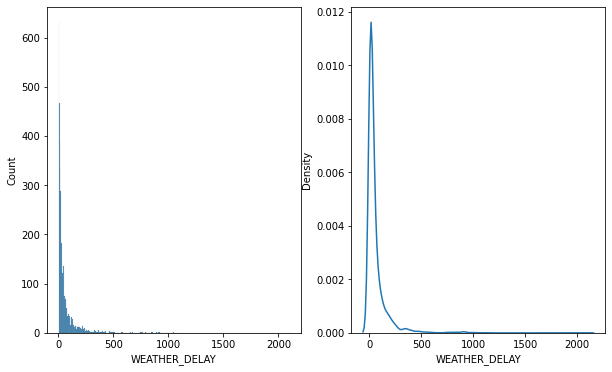

In [21]:
fig,axes = plt.subplots(ncols=2,figsize=(10,6))
sns.histplot(ax=axes[0],x=df1['WEATHER_DELAY'],bins=500)
sns.kdeplot(ax=axes[1],x=df1['WEATHER_DELAY'])

In [25]:
def mapiings(x):
    if(x==0):
        return 0
    elif(x<30):
        return 30
    elif(x<60):
        return 60
    elif(x<120):
        return 120
    else:
        return 121
df['delay'] = df['WEATHER_DELAY'].map(mapiings)

In [26]:
df['delay'].value_counts()

0      383090
30       2536
60        778
121       579
120       574
Name: delay, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Condition'>

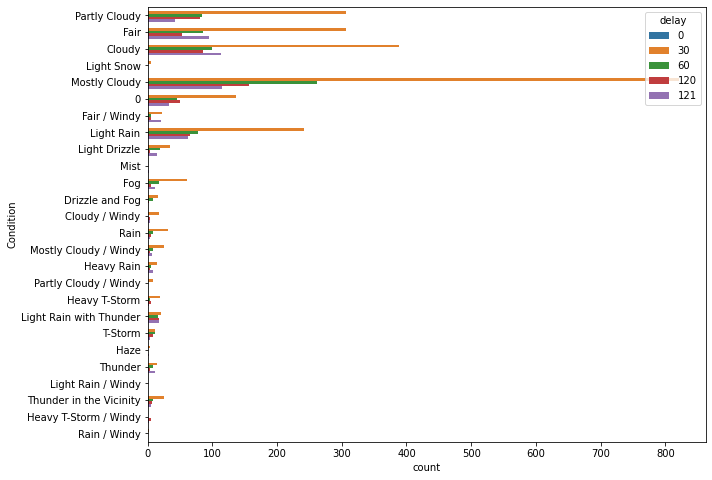

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(y=df[df['delay']>0]['Condition'],hue=df['delay'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387557 entries, 0 to 390078
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              387557 non-null  object 
 1   ORIGIN               387557 non-null  object 
 2   DEST                 387557 non-null  object 
 3   CRS_DEP_TIME         387557 non-null  int64  
 4   DEP_TIME             387557 non-null  float64
 5   DEP_DELAY            387557 non-null  float64
 6   WHEELS_OFF           387557 non-null  float64
 7   WHEELS_ON            387557 non-null  float64
 8   TAXI_IN              387557 non-null  float64
 9   CRS_ARR_TIME         387557 non-null  int64  
 10  ARR_DELAY            387557 non-null  float64
 11  CANCELLED            387557 non-null  float64
 12  DIVERTED             387557 non-null  float64
 13  CRS_ELAPSED_TIME     387557 non-null  float64
 14  ACTUAL_ELAPSED_TIME  387557 non-null  float64
 15  AIR_TIME         

In [ ]:
df.loc[df['Condition']=='0','Condition'] = None

In [45]:
df['Condition'].value_counts()

Mostly Cloudy              120319
Fair                        93184
Cloudy                      57690
Partly Cloudy               54502
Light Rain                  22743
Fog                          6638
Light Drizzle                5379
Rain                         3115
Fair / Windy                 2168
Drizzle and Fog              1619
Mostly Cloudy / Windy        1515
Cloudy / Windy               1389
Thunder in the Vicinity      1256
T-Storm                      1215
Heavy Rain                   1213
Thunder                      1024
Light Rain with Thunder       818
Haze                          651
Heavy T-Storm                 566
Mist                          522
Partly Cloudy / Windy         374
Light Rain / Windy            287
Light Snow                    157
Heavy Rain / Windy            137
Rain / Windy                  137
Heavy T-Storm / Windy         113
Patches of Fog                 88
Name: Condition, dtype: int64

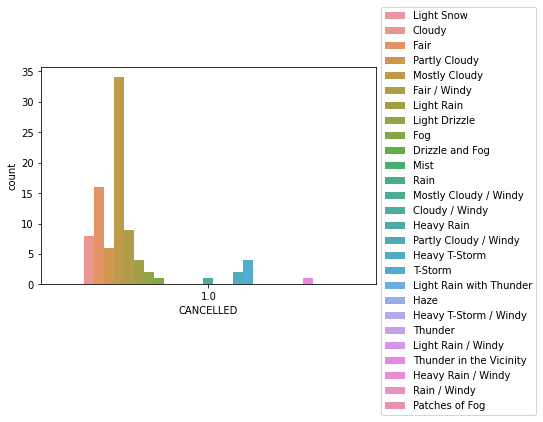

In [46]:
sns.countplot(x=df[df['CANCELLED']==1]['CANCELLED'],hue=df['Condition'])
plt.legend(bbox_to_anchor=(1,1.3))

In [47]:
df.head()

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,LATE_AIRCRAFT_DELAY,time,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,delay
0,2018-01-01,EWR,ATL,1044,1055.0,11.0,1106.0,1310.0,5.0,1318,-3.0,0.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,2018-01-01 10:55:00,19,6,57,15,0,29.36,0.0,Light Snow,0
1,2018-01-01,EWR,ATL,1409,1429.0,20.0,1442.0,1646.0,9.0,1643,12.0,0.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,2018-01-01 14:29:00,25,9,50,12,0,29.34,0.0,Cloudy,0
2,2018-01-01,EWR,ATL,945,945.0,0.0,959.0,1157.0,5.0,1219,-17.0,0.0,0.0,154.0,137.0,118.0,746.0,0.0,0.0,0.0,2018-01-01 09:45:00,19,6,57,15,0,29.33,0.0,Cloudy,0
3,2018-01-01,IAH,ATL,1950,2311.0,201.0,2323.0,148.0,7.0,2251,184.0,0.0,0.0,121.0,104.0,85.0,689.0,0.0,0.0,52.0,2018-01-01 23:11:00,20,6,55,12,0,29.39,0.0,Fair,0
4,2018-01-01,EWR,ATL,1711,1720.0,9.0,1746.0,1945.0,5.0,1945,5.0,0.0,0.0,154.0,150.0,119.0,746.0,0.0,0.0,0.0,2018-01-01 17:20:00,27,10,49,13,0,29.35,0.0,Partly Cloudy,0


In [52]:
df1 = df.drop(['WHEELS_ON','WHEELS_OFF','DEST','FL_DATE','DEP_TIME',
         'TAXI_IN','CRS_ARR_TIME',"AIR_TIME",'ACTUAL_ELAPSED_TIME','CRS_ELAPSED_TIME'],axis=1)

In [55]:
df1.sort_values('time',inplace=True)
df1.set_index('time').to_csv('/home/shaury/Desktop/pvsc/dataset/final.csv')